## Problem Statement
A stock price always fluctuates, but is there a relation between a closing price and its moving averages?
An Analyst wants to showcase how the stock would move, he has 5 years of stock price data with him, on which he needs to perform the analysis.

### Objective

Find the futuristic movement of the stock "GOOG" based on its price for the last 5 years.

### Data Description

#### Date : Date of the stock price
#### Open : Opening price of the stock on that day
#### High : Peak price of the stock on that day
#### Low  : Lowest price of the stock on that day
#### Close : Closing price of the stock on that day
#### Volume : Total Volume of traded on that day

### Hints
Perform the follwoing Steps:
1. Get 5 years of data from finance paackage with the Ticker Symbol 'GOOG'
2. Create 50DMA and 200DMA
3. Plot it with the Actual Price
4. Basic EDA on the Data.
5. Fit Statsmodel OLS to find the best possible features.

In [1]:
#Import Libraries
import yfinance as yahooFinance
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
google = yahooFinance.Ticker('GOOG')

In [3]:
#5 years of data
df = google.history('5Y')

In [4]:
#Print the head of the data
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-07-20 00:00:00-04:00,59.348000,59.842999,59.210999,59.245499,24948000,0.0,0.0
2018-07-23 00:00:00-04:00,59.050499,60.324501,59.049999,60.275002,52384000,0.0,0.0
2018-07-24 00:00:00-04:00,63.129501,63.299999,61.778000,62.403999,66364000,0.0,0.0
2018-07-25 00:00:00-04:00,61.956501,63.292999,61.956501,63.185001,42556000,0.0,0.0
2018-07-26 00:00:00-04:00,62.549999,63.488548,62.451000,63.416500,48112000,0.0,0.0


In [5]:
#Print the tail of the data
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-07-14 00:00:00-04:00,125.129997,127.089996,124.900002,125.699997,20482800,0.0,0.0
2023-07-17 00:00:00-04:00,126.059998,127.279999,124.500000,125.059998,20675300,0.0,0.0
2023-07-18 00:00:00-04:00,124.904999,124.989998,123.300003,124.080002,21071200,0.0,0.0
2023-07-19 00:00:00-04:00,124.790001,125.470001,122.470001,122.779999,22239400,0.0,0.0
2023-07-20 00:00:00-04:00,122.120003,124.699997,121.019997,121.379997,10653501,0.0,0.0


In [6]:
df.shape

(1258, 7)

In [7]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.000000
mean,91.664457,92.741890,90.686782,91.730887,3.032096e+07,0.0,0.015898
std,30.097714,30.401850,29.780392,30.080606,1.319193e+07,0.0,0.563884
min,48.695000,50.176998,48.505501,48.811001,6.936000e+06,0.0,0.000000
25%,61.855624,62.367001,61.360623,61.927625,2.192700e+07,0.0,0.000000
50%,88.888500,89.824749,87.815750,88.880501,2.705800e+07,0.0,0.000000
75%,116.755627,118.327499,115.306501,116.997873,3.418700e+07,0.0,0.000000
max,151.863495,152.100006,149.887497,150.709000,1.241400e+08,0.0,20.000000


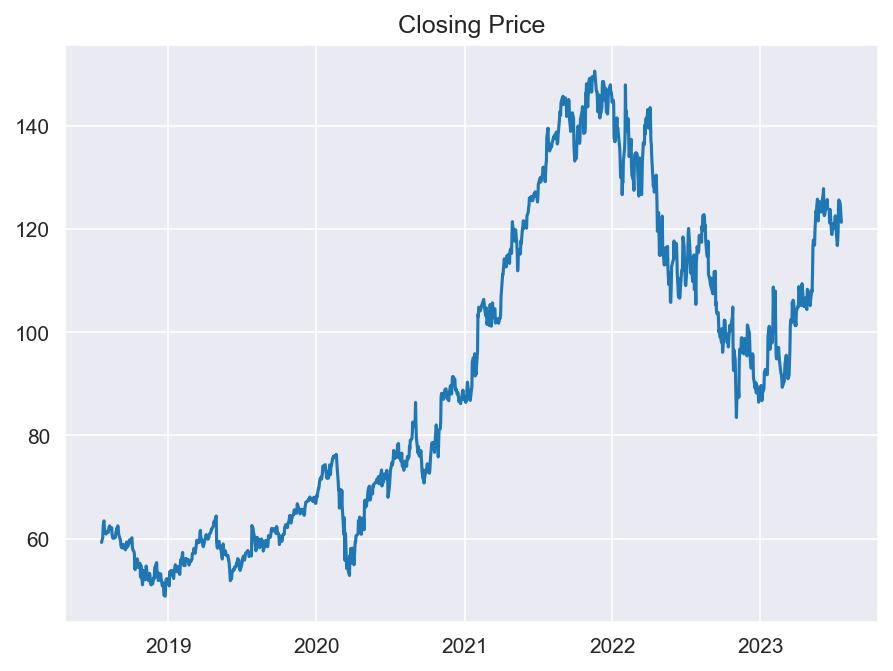

In [8]:
#Overview of closing price before calculating DMAs
sns.set_style('darkgrid')
plt.figure(figsize = (7,5), dpi=150)
plt.title('Closing Price')
plt.plot(df['Close'])

In [9]:
#Calculate 50DMA
df['fiftyDMA'] = df['Close'].rolling(50).mean()

In [10]:
#Calculate 200DMA
df['thDMA'] = df['Close'].rolling(200).mean()

In [11]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,fiftyDMA,thDMA
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.000000,1209.000000,1059.000000
mean,91.664457,92.741890,90.686782,91.730887,3.032096e+07,0.0,0.015898,91.732134,93.333746
std,30.097714,30.401850,29.780392,30.080606,1.319193e+07,0.0,0.563884,29.676553,28.430863
min,48.695000,50.176998,48.505501,48.811001,6.936000e+06,0.0,0.000000,52.442220,55.768365
25%,61.855624,62.367001,61.360623,61.927625,2.192700e+07,0.0,0.000000,62.281740,64.796534
50%,88.888500,89.824749,87.815750,88.880501,2.705800e+07,0.0,0.000000,92.934600,96.199668
75%,116.755627,118.327499,115.306501,116.997873,3.418700e+07,0.0,0.000000,114.754100,118.893039
max,151.863495,152.100006,149.887497,150.709000,1.241400e+08,0.0,20.000000,146.183850,139.273730


In [12]:
df.drop(columns = ['Dividends','Stock Splits'], inplace = True)

In [13]:
df.head()

,Open,High,Low,Close,Volume,fiftyDMA,thDMA
Date,,,,,,,
2018-07-20 00:00:00-04:00,59.348000,59.842999,59.210999,59.245499,24948000,NaN,NaN
2018-07-23 00:00:00-04:00,59.050499,60.324501,59.049999,60.275002,52384000,NaN,NaN
2018-07-24 00:00:00-04:00,63.129501,63.299999,61.778000,62.403999,66364000,NaN,NaN
2018-07-25 00:00:00-04:00,61.956501,63.292999,61.956501,63.185001,42556000,NaN,NaN
2018-07-26 00:00:00-04:00,62.549999,63.488548,62.451000,63.416500,48112000,NaN,NaN


In [14]:
df.tail()

,Open,High,Low,Close,Volume,fiftyDMA,thDMA
Date,,,,,,,
2023-07-14 00:00:00-04:00,125.129997,127.089996,124.900002,125.699997,20482800,120.6299,103.289625
2023-07-17 00:00:00-04:00,126.059998,127.279999,124.500000,125.059998,20675300,121.0087,103.424475
2023-07-18 00:00:00-04:00,124.904999,124.989998,123.300003,124.080002,21071200,121.3861,103.541175
2023-07-19 00:00:00-04:00,124.790001,125.470001,122.470001,122.779999,22239400,121.7174,103.664625
2023-07-20 00:00:00-04:00,122.120003,124.699997,121.019997,121.379997,10653501,121.9802,103.790775


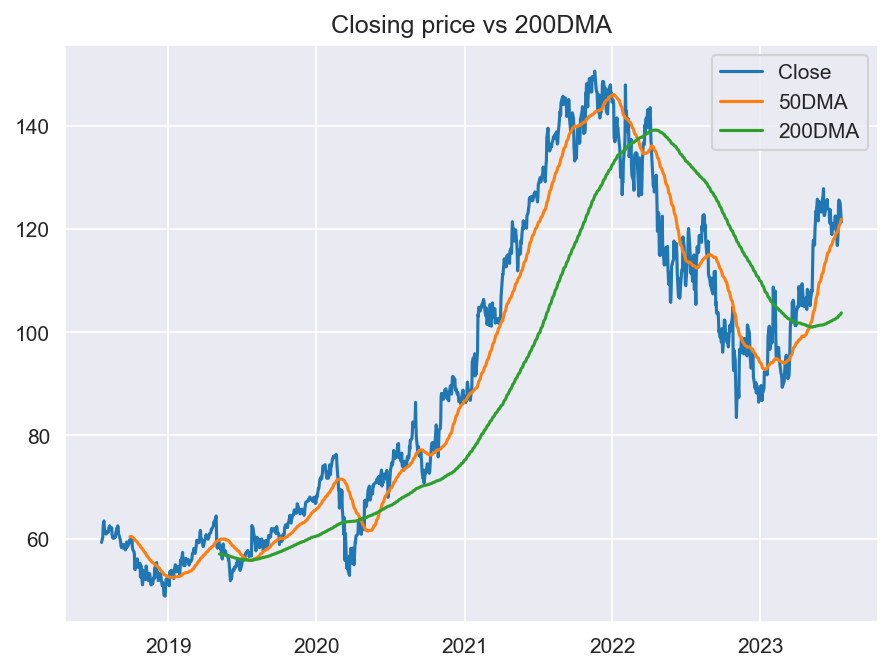

In [15]:
#plot closing price vs 50DMA vs 200DMA
sns.set_style('darkgrid')
plt.figure(figsize = (7,5), dpi = 150)
plt.title('Closing price vs 200DMA')
plt.plot(df['Close'], label = 'Close')
plt.plot(df['fiftyDMA'], label = '50DMA')
plt.plot(df['thDMA'], label = '200DMA')
plt.legend()



### Inference from the above Graph.

1. 50DMA and 200DMA are fairly good indicators of how stock is moving
2. if the closing price is above the 50DMA or 200DMA. it is usually on the uptrend or bullish.
3. if the closing price is below the 50DMA or 200DMA, it usually means that it is in a down trend.
4. Every point where 50DMA and 200DMA intersect, the market usually reverses its trend(High-> Low| Low-> High)
5. The huge dip at the March 2020, indicates the Covid-19 market crash.

### FInding the possible futuristic movement of the stock 

<Axes: >

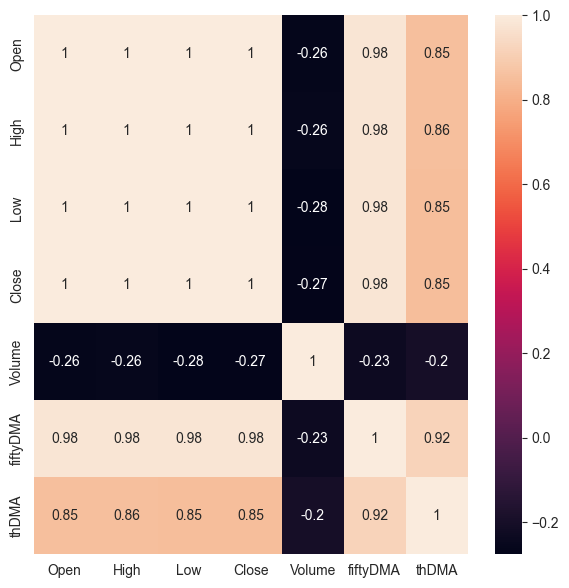

In [17]:
# Analyse the correlation between each variables
plt.figure(figsize=(7,7), dpi = 100)
sns.heatmap(df.corr(),annot = True)

### Inference from the heatmap
1. Closing price has very high correlation with almost all the variables except the volume
2. There is strong multi colliniearity between the variables as well.

<Axes: title={'center': 'Distplot of 50DMA'}, xlabel='fiftyDMA', ylabel='Density'>

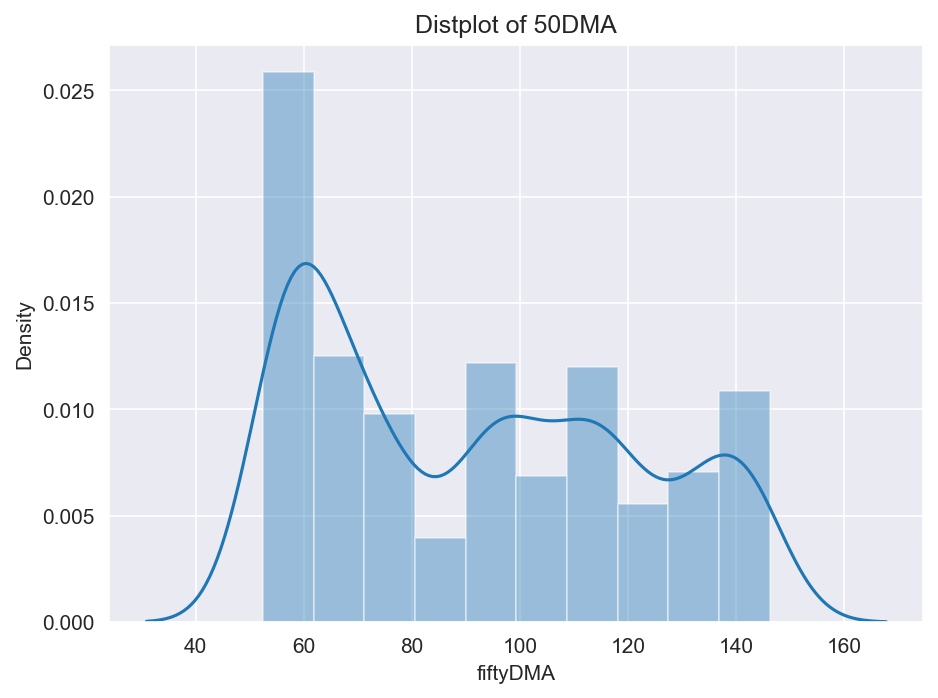

In [19]:
# Plot the distplot of 50DMA
sns.set_style('darkgrid')
plt.figure(figsize = (7,5), dpi = 150)
plt.title('Distplot of 50DMA')
sns.distplot(df['fiftyDMA'])

<Axes: title={'center': 'Distplot of the Clsoing Price'}, xlabel='Close', ylabel='Density'>

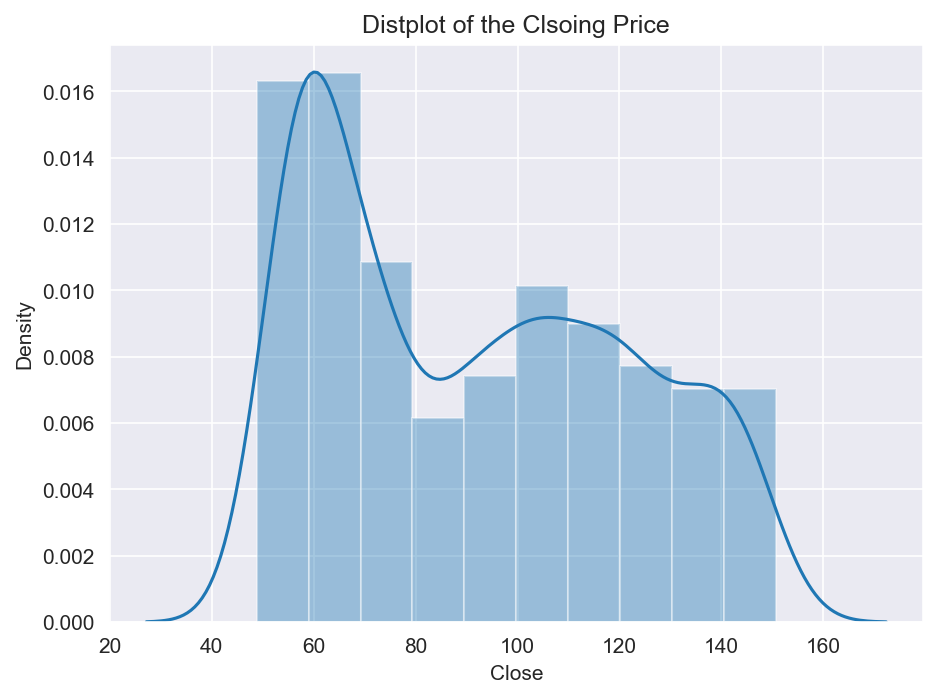

In [20]:
# Plot the distplot od the close price
sns.set_style('darkgrid')
plt.figure(figsize = (7,5), dpi = 150)
plt.title('Distplot of the Clsoing Price')
sns.distplot(df['Close'])

In [22]:
import statsmodels.formula.api as snf

In [24]:
model = snf.ols(formula = 'Close ~ fiftyDMA', data = df)
model = model.fit()

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                 2.591e+04
Date:                Thu, 20 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:06:35   Log-Likelihood:                -3945.8
No. Observations:                1209   AIC:                             7896.
Df Residuals:                    1207   BIC:                             7906.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3563      0.592      3.982      0.000       1.195       3.517
fiftyDMA       0.9881      0.006    160.972      0.000       0.976       1.000
==============================================================================
Omnibus:                       52.538   Durbin-Watson:                   0.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.877
Skew:                          -0.506   Prob(JB):                     1.64e-13
Kurtosis:                       3.379   Cond. No.                         313.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Inferences from the Summary
1. Good r2 scores as coef
2.Since they are very highly correlated, -1, it isn't wise to fir the model based on the parameters in real life.

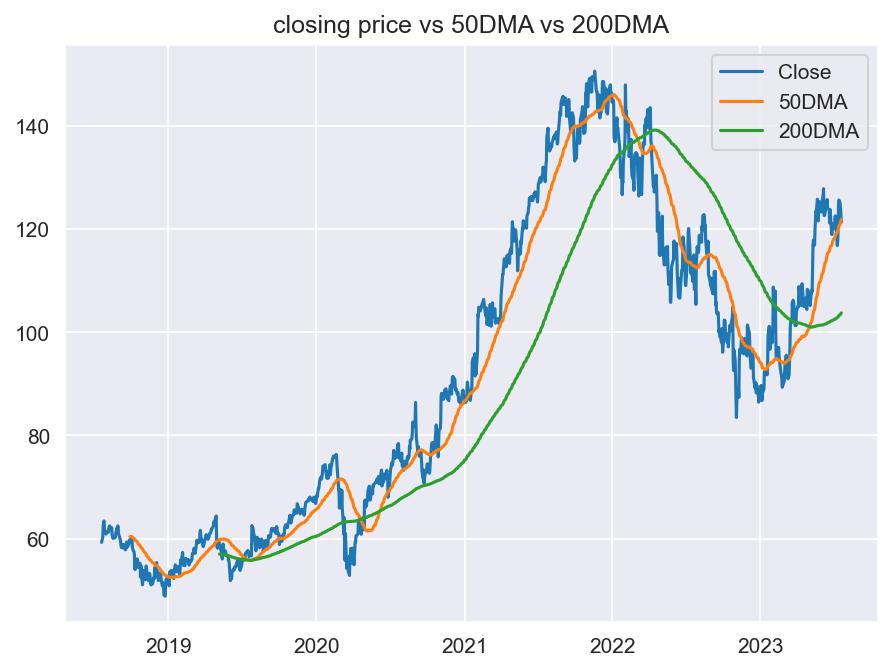

In [26]:
#plot closing price vs 50DMA vs 200DMA
sns.set_style('darkgrid')
plt.figure(figsize = (7,5), dpi = 150)
plt.title('closing price vs 50DMA vs 200DMA')
plt.plot(df['Close'], label = 'Close')
plt.plot(df['fiftyDMA'], label = '50DMA')
plt.plot(df['thDMA'], label = '200DMA')
plt.legend()